In [4]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras import layers
from keras import models
import  pandas as pd
import  os
from keras.models import Sequential, load_model

## https://blog.csdn.net/muzi_water/article/details/103969988
 

In [5]:
def NormalizeMult(data):
    data = np.array(data)
    normalize = np.arange(2*data.shape[1],dtype='float64')
    normalize = normalize.reshape(data.shape[1],2)
    print(normalize.shape)
    for i in range(0,data.shape[1]):
        #第i列
        list = data[:,i]
        listlow,listhigh =  np.percentile(list, [0, 100])
        # print(i)
        normalize[i,0] = listlow
        normalize[i,1] = listhigh
        delta = listhigh - listlow
        if delta != 0:
            #第j行
            for j in range(0,data.shape[0]):
                data[j,i]  =  (data[j,i] - listlow)/delta
    #np.save("./normalize.npy",normalize)
    return  data,normalize

In [6]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

In [7]:

def reshape_y_hat(y_hat,dim):
    re_y = []
    i = 0
    while i < len(y_hat):
        tmp = []
        for j in range(dim):
            tmp.append(y_hat[i+j])
        i = i + dim
        re_y.append(tmp)
    re_y = np.array(re_y, dtype='float64')
    return re_y


In [8]:
def NormalizeMultUseData(data,normalize):
 
    for i in range(0, data.shape[1]):
 
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
 
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data


In [9]:
def FNormalizeMult(data,normalize):
 
    data = np.array(data, dtype='float64')
    #列
    for i in range(0, data.shape[1]):
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
        print("listlow, listhigh, delta", listlow, listhigh, delta)
        #行
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = data[j, i]*delta + listlow
 
    return data

In [10]:
## https://blog.csdn.net/qq_35649669/article/details/89575949

def create_dataset(data,n_predictions,n_next):
    '''
    对数据进行处理
    '''
    dim = data.shape[1]
    train_X, train_Y = [], []
    for i in range(data.shape[0]-n_predictions-n_next-1):
        a = data[i:(i+n_predictions),:]
        train_X.append(a)
        tempb = data[(i+n_predictions):(i+n_predictions+n_next),:]
        b = []
        for j in range(len(tempb)):
            for k in range(dim):
                b.append(tempb[j,k])
        train_Y.append(b)
    train_X = np.array(train_X,dtype='float64')
    train_Y = np.array(train_Y,dtype='float64')

    return train_X, train_Y



In [11]:
def trainModel(train_X, train_Y):
    '''
    trainX，trainY: 训练LSTM模型所需要的数据
    '''
    model = Sequential()
    model.add(LSTM(
        140,
        input_shape=(train_X.shape[1], train_X.shape[2]),
        return_sequences=True))
    model.add(Dropout(0.3))

    model.add(LSTM(
        140,
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        train_Y.shape[1]))
    model.add(Activation("relu"))

    model.compile(loss='mse', optimizer='adam')
    model.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1)

    return model


In [12]:
all_data = pd.read_csv('./data/2021MCMProblemC_DataSet.csv', encoding='utf-8', index_col='Detection Date')
# all_data
## for the first question, only keep track of the sightings in 2019 and 2020
all_data.index = pd.to_datetime(all_data.index, errors='coerce')
all_data = all_data.sort_values(by = 'Detection Date', ascending=True)
data = all_data[(all_data.index >= "2019/1/1") & (all_data['Lab Status'] == "Unverified") | (all_data['Lab Status'] == "Positive ID")]
train_data= data


In [13]:
train_data = pd.DataFrame(train_data, columns = ['Latitude', 'Longitude'])
train_data = train_data.values
train_data, normalize = NormalizeMult(train_data)
train_X, train_Y = create_dataset(train_data, 200, 50)
train_data

(2, 2)


array([[0.18401312, 0.63756412],
       [0.49558309, 0.28713193],
       [0.61144959, 0.3333948 ],
       ...,
       [0.48791756, 0.32534307],
       [0.88488353, 0.27687647],
       [0.56437645, 0.51770374]])

In [14]:
model = trainModel(train_X, train_Y)

Epoch 1/100
33/33 [==============================] - 25s 609ms/step - loss: 0.1529
Epoch 2/100
33/33 [==============================] - 23s 718ms/step - loss: 0.0542
Epoch 3/100
33/33 [==============================] - 22s 656ms/step - loss: 0.0447
Epoch 4/100
33/33 [==============================] - 20s 624ms/step - loss: 0.0419
Epoch 5/100
33/33 [==============================] - 21s 654ms/step - loss: 0.0409
Epoch 6/100
33/33 [==============================] - 21s 633ms/step - loss: 0.0407
Epoch 7/100
33/33 [==============================] - 22s 677ms/step - loss: 0.0396
Epoch 8/100
33/33 [==============================] - 21s 644ms/step - loss: 0.0395
Epoch 9/100
33/33 [==============================] - 22s 678ms/step - loss: 0.0391
Epoch 10/100
33/33 [==============================] - 21s 651ms/step - loss: 0.0392
Epoch 11/100
33/33 [==============================] - 22s 664ms/step - loss: 0.0380
Epoch 12/100
33/33 [==============================] - 22s 653ms/step - loss: 0.0380
E

In [15]:
# numpy.save("./MultiSteup2.npy",train_data)
# model.save("./MultiSteup2.h5")
test = data[-200:]
test_X = pd.DataFrame(test, columns = ['Latitude', 'Longitude'])
test_X = test_X.values
test_X = test_X.reshape(1, 200, 2)
y_hat = model.predict(test_X)
y_hat = y_hat.reshape(y_hat.shape[1])
y_hat = reshape_y_hat(y_hat, dim=2)
print(y_hat)
y_hat = FNormalizeMult(y_hat, normalize)
forecast = pd.DataFrame(y_hat,index=data.index[-50:], columns=['Latitude', 'Longitude'])
forecast['Latitude'] = forecast['Latitude']-3
forecast.to_csv("./coordinates.csv")

[[1.02931285 0.24333835]
 [1.12076914 0.07054748]
 [1.14196491 0.13380408]
 [1.16045356 0.23275104]
 [1.06148601 0.12212281]
 [0.96841913 0.28453094]
 [0.84605396 0.22943018]
 [0.97454262 0.12237328]
 [1.21631026 0.0841694 ]
 [1.25801885 0.02188355]
 [1.05072355 0.07873257]
 [1.17544687 0.10701188]
 [1.14351952 0.12080947]
 [1.10679412 0.08892909]
 [1.08492374 0.        ]
 [1.13616204 0.06642473]
 [1.28875816 0.18280691]
 [1.20981002 0.20899303]
 [1.23354816 0.        ]
 [1.24903321 0.03160477]
 [1.04662657 0.16088592]
 [1.2185837  0.02075243]
 [1.18546903 0.12249471]
 [1.18054557 0.19922331]
 [1.04311776 0.0735296 ]
 [1.11797476 0.1346986 ]
 [0.94641399 0.        ]
 [1.20174658 0.05515134]
 [1.05277312 0.01190436]
 [1.10902643 0.        ]
 [1.19036984 0.        ]
 [1.023754   0.        ]
 [0.8209483  0.15396532]
 [1.1486814  0.01269403]
 [1.1452843  0.1333473 ]
 [0.96974045 0.15156655]
 [1.12791538 0.16793996]
 [1.0682857  0.29610169]
 [1.24821162 0.35236862]
 [1.1437999  0.13519926]


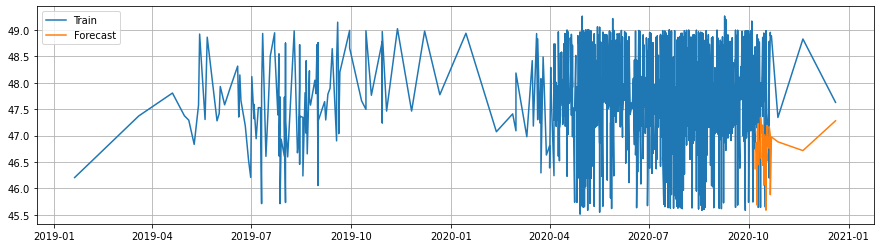

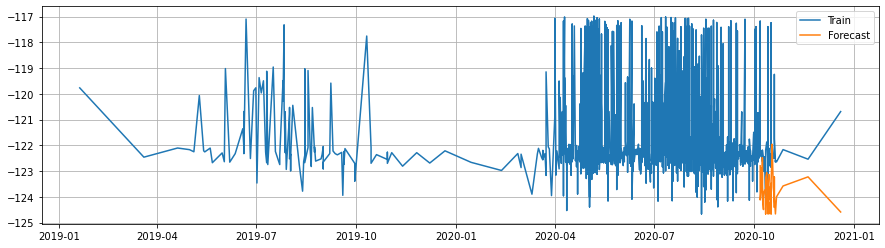

In [16]:
plt.figure(figsize=(15,4))
forecast
plt.grid(True)
plt.plot(data['Latitude'], label='Train')
plt.plot(forecast['Latitude'], label='Forecast')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(data['Longitude'], label='Train')
plt.plot(forecast['Longitude'], label='Forecast')
plt.legend(loc='best')
